**Individual Assignment on Linear Regression for Prediction**

**Objective:** 

To implement and evaluate a linear regression model for a regression problem. Students will gain experience in data preprocessing, model training, evaluation, and interpretation, focusing on the principles of linear regression.

**Dataset:**

**Medical Insurance Cost Prediction**


Dataset to Predict Medical Insurance Cost using Machine Learning

**Source Link:**

https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction/code

**-------------------------------------------------------------------------------------------------------------------------------------------------------**


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
# Load the dataset
df = pd.read_csv("E:/Computer Science SEMO/6th semester/CS 505/Medical Insurance cost/Medical Insurance/medical_insurance.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None
               age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.220000     0.000000   4687.797000
50%      39.000000    30.447500     1.000000   9333.014350
75%      51.000000    34.770000     2.000000  16577.779500
ma

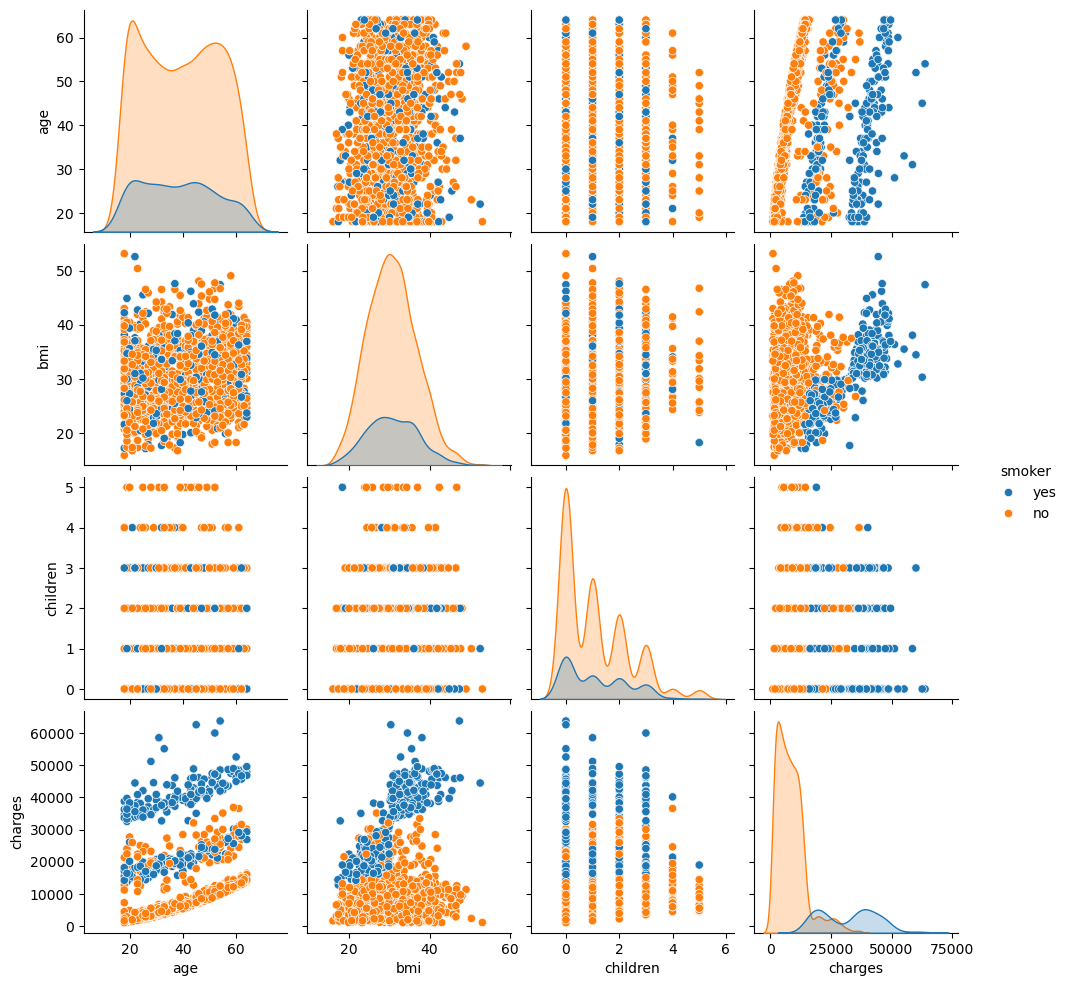

In [40]:
# Explore the dataset
print(df.info())
print(df.describe())
sns.pairplot(df, hue="smoker")
plt.show()


In [41]:
# Handle missing values (if any)
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop(columns=["charges"])
y = df["charges"]

In [42]:
# Identify categorical and numerical features
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]

In [43]:
# Create transformers for preprocessing
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")
numerical_transformer = StandardScaler()

In [44]:
# Combine transformers in a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [45]:
# Define multiple linear regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5)
}


In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store trained pipelines
trained_pipelines = {}

# Train and evaluate each model
model_performance = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model)])
    pipeline.fit(X_train, y_train)
    trained_pipelines[name] = pipeline
    
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    model_performance[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}
    print(f"{name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}\n")

Linear Regression Performance:
Mean Absolute Error (MAE): 4160.247974762993
Root Mean Squared Error (RMSE): 6319.271678607549
R-squared (R²): 0.73981661775643

Ridge Regression Performance:
Mean Absolute Error (MAE): 4164.810297095437
Root Mean Squared Error (RMSE): 6320.0987557463495
R-squared (R²): 0.7397485068029448

Lasso Regression Performance:
Mean Absolute Error (MAE): 4160.237368797649
Root Mean Squared Error (RMSE): 6319.273512262978
R-squared (R²): 0.7398164667622127

Elastic Net Performance:
Mean Absolute Error (MAE): 4708.576700295713
Root Mean Squared Error (RMSE): 6755.328580901421
R-squared (R²): 0.702670187392749



In [47]:
# Compare model performance
performance_df = pd.DataFrame(model_performance).T
print("Model Performance Comparison:\n", performance_df)

Model Performance Comparison:
                            MAE         RMSE        R²
Linear Regression  4160.247975  6319.271679  0.739817
Ridge Regression   4164.810297  6320.098756  0.739749
Lasso Regression   4160.237369  6319.273512  0.739816
Elastic Net        4708.576700  6755.328581  0.702670


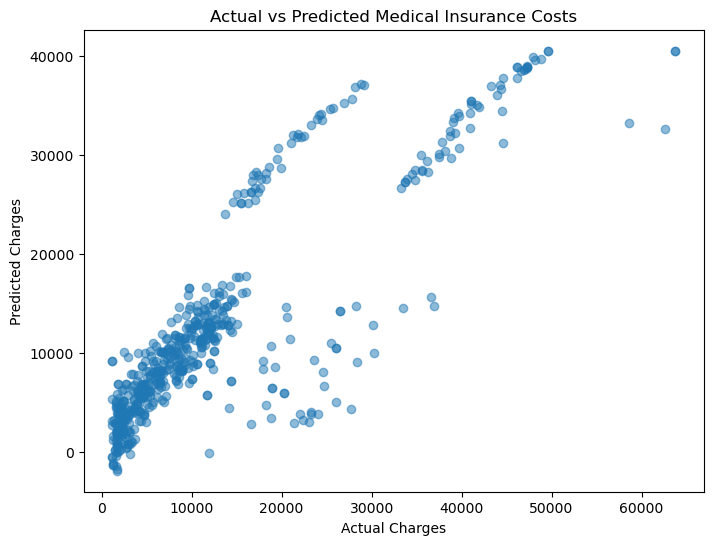

In [48]:
# Visualize predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, trained_pipelines["Linear Regression"].predict(X_test), alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Insurance Costs")
plt.show()

In [49]:
# Analyze coefficients for the linear regression model
lr_pipeline = trained_pipelines["Linear Regression"]
regressor = lr_pipeline.named_steps["regressor"]
preprocessor_fit = lr_pipeline.named_steps["preprocessor"]
feature_names = numerical_features + list(preprocessor_fit.named_transformers_["cat"].get_feature_names_out())
coefficients = pd.DataFrame({"Feature": feature_names, "Coefficient": regressor.coef_})
print("Feature Importance in Linear Regression:")
print(coefficients.sort_values(by="Coefficient", ascending=False))

Feature Importance in Linear Regression:
            Feature   Coefficient
4        smoker_yes  23879.504402
0               age   3544.758928
1               bmi   1991.759273
2          children    550.173312
3          sex_male    -71.952764
5  region_northwest   -407.023971
7  region_southwest  -1061.492793
6  region_southeast  -1150.806000


**Interpretation and Analysis:**

1. **Feature Influence:**
   - The most influential features based on coefficients are likely 'smoker' (positive impact) and 'age' or 'bmi'.
   - Being a smoker significantly increases medical costs, which aligns with domain knowledge.
     
2. **Model Performance Discussion:**
   - The R² value indicates how well the model explains variance in charges. A higher R² means better fit.
   - MAE and RMSE indicate prediction error magnitude. Lower values are better.
     
3. **Comparison of Linear Regression Variants:**
   - Ridge regression handles multicollinearity better but does not shrink coefficients to zero.
   - Lasso regression reduces feature importance, possibly improving interpretability by selecting fewer features.
   - Elastic Net balances both approaches.